In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Veri işlemleri için
import pandas as pd
import numpy as np

# Görselleştirme için
import matplotlib.pyplot as plt
import seaborn as sns

# Uyarıları gizlemek için (isteğe bağlı)
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accident_coords_update.ipynb
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Areas.shp
/kaggle/input/2000-16-traffic-flow-england-scotland-wales/Local_Authority_Districts_Dec_2016.geojson


In [3]:
# Trafik verisi
traffic_df = pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/ukTrafficAADF.csv')

# Kaza verileri
accidents_df1 = pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2005_to_2007.csv')
accidents_df2 = pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2009_to_2011.csv')
accidents_df3 = pd.read_csv('/kaggle/input/2000-16-traffic-flow-england-scotland-wales/accidents_2012_to_2014.csv')

# Kaza verilerini birleştiriyoruz
accidents_df = pd.concat([accidents_df1, accidents_df2, accidents_df3], ignore_index=True)

In [4]:
# Trafik verisinin ilk 5 satırına göz atalım
traffic_df.head()


,AADFYear,CP,Estimation_method,Estimation_method_detailed,Region,LocalAuthority,Road,RoadCategory,Easting,Northing,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
0,2000,6007,Counted,Manual count,Yorkshire and the Humber,Rotherham,M1,TM,446000,389300,...,5351,656,711,1588,4715,2149,15170,111146,53.398531,-1.309655
1,2000,6009,Counted,Manual count,Yorkshire and the Humber,Leeds,M621,TM,432150,429500,...,1293,272,287,628,1494,921,4895,65939,53.760869,-1.513814
2,2000,6035,Counted,Manual count,Yorkshire and the Humber,Doncaster,M18,TM,466400,407900,...,1952,257,239,745,3695,2000,8888,40229,53.563523,-0.998970
3,2000,6054,Counted,Manual count,Yorkshire and the Humber,Calderdale,M62,TM,404000,416600,...,3121,508,354,1786,5902,3438,15109,85759,53.645893,-1.940967
4,2000,6055,Counted,Manual count,Yorkshire and the Humber,Leeds,M62,TM,426000,426200,...,4030,624,423,1947,6669,3743,17436,98487,53.731551,-1.607374


In [5]:
# Trafik verisinin genel bilgisi
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275385 entries, 0 to 275384
Data columns (total 29 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AADFYear                    275385 non-null  int64  
 1   CP                          275385 non-null  int64  
 2   Estimation_method           237812 non-null  object 
 3   Estimation_method_detailed  237812 non-null  object 
 4   Region                      275385 non-null  object 
 5   LocalAuthority              275385 non-null  object 
 6   Road                        275385 non-null  object 
 7   RoadCategory                275385 non-null  object 
 8   Easting                     275385 non-null  int64  
 9   Northing                    275385 non-null  int64  
 10  StartJunction               275129 non-null  object 
 11  EndJunction                 275147 non-null  object 
 12  LinkLength_km               275385 non-null  float64
 13  LinkLength_mil

In [9]:
# Genel özet trafik istatistikleri
traffic_df.describe()

,AADFYear,CP,Easting,Northing,LinkLength_km,LinkLength_miles,PedalCycles,Motorcycles,CarsTaxis,BusesCoaches,...,V2AxleRigidHGV,V3AxleRigidHGV,V4or5AxleRigidHGV,V3or4AxleArticHGV,V5AxleArticHGV,V6orMoreAxleArticHGV,AllHGVs,AllMotorVehicles,Lat,Lon
count,275385.000000,275385.000000,275385.000000,2.753850e+05,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,...,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000,275385.000000
mean,2007.967907,47277.490437,425675.250780,3.561826e+05,2.757116,1.712899,123.314654,222.099297,16813.332923,248.662175,...,489.379193,83.551450,88.924513,74.249433,247.927389,271.747354,1255.774163,21152.693542,53.092936,-1.654634
std,4.862875,27004.889605,98687.570954,1.869923e+05,3.815569,2.371086,421.440798,420.874069,16618.266842,374.650774,...,683.713666,121.773472,142.005359,183.767833,752.311296,835.966781,2446.175298,21536.689989,1.681459,1.478250
min,2000.000000,60.000000,69987.000000,7.625000e+04,0.070000,0.040000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.583853,-7.442680
25%,2004.000000,26218.000000,352970.000000,1.921200e+05,0.600000,0.370000,5.000000,58.000000,7125.000000,60.000000,...,148.000000,24.000000,15.000000,7.000000,9.000000,10.000000,252.000000,8941.000000,51.614977,-2.711540
50%,2008.000000,47252.000000,430000.000000,3.240000e+05,1.400000,0.870000,26.000000,113.000000,12255.000000,127.000000,...,273.000000,46.000000,41.000000,20.000000,34.000000,37.000000,489.000000,15143.000000,52.807705,-1.549475
75%,2012.000000,74392.000000,510600.000000,4.296000e+05,3.200000,1.990000,83.000000,214.000000,19951.000000,280.000000,...,517.000000,91.000000,100.000000,56.000000,125.000000,137.000000,1041.000000,24660.000000,53.760638,-0.389834
max,2016.000000,99967.000000,655040.000000,1.205400e+06,55.500000,34.490000,18629.000000,9815.000000,207133.000000,11359.000000,...,10942.000000,5968.000000,3684.000000,3949.000000,11034.000000,13758.000000,27095.000000,262842.000000,60.727231,1.754553


In [10]:
# Eksik veri kontrolü
traffic_df.isnull().sum()

AADFYear                          0
CP                                0
Estimation_method             37573
Estimation_method_detailed    37573
Region                            0
LocalAuthority                    0
Road                              0
RoadCategory                      0
Easting                           0
Northing                          0
StartJunction                   256
EndJunction                     238
LinkLength_km                     0
LinkLength_miles                  0
PedalCycles                       0
Motorcycles                       0
CarsTaxis                         0
BusesCoaches                      0
LightGoodsVehicles                0
V2AxleRigidHGV                    0
V3AxleRigidHGV                    0
V4or5AxleRigidHGV                 0
V3or4AxleArticHGV                 0
V5AxleArticHGV                    0
V6orMoreAxleArticHGV              0
AllHGVs                           0
AllMotorVehicles                  0
Lat                         

In [13]:
# Yeksikleri "Unknown" gibi bir etiketle doldurabiliriz
traffic_df['Estimation_method'].fillna('Unknown', inplace=True)
traffic_df['Estimation_method_detailed'].fillna('Unknown', inplace=True)
traffic_df['StartJunction'].fillna('Unknown', inplace=True)
traffic_df['EndJunction'].fillna('Unknown', inplace=True)

In [14]:
# Yıllara Göre Gözlem Dağılımı
traffic_df['AADFYear'].value_counts().sort_index()

AADFYear
2000    16146
2001    16157
2002    16175
2003    16158
2004    16210
2005    16306
2006    16366
2007    16363
2008    16338
2009    16379
2010    16358
2011    16344
2012    16445
2013    16467
2014    16500
2015    16504
2016    14169
Name: count, dtype: int64

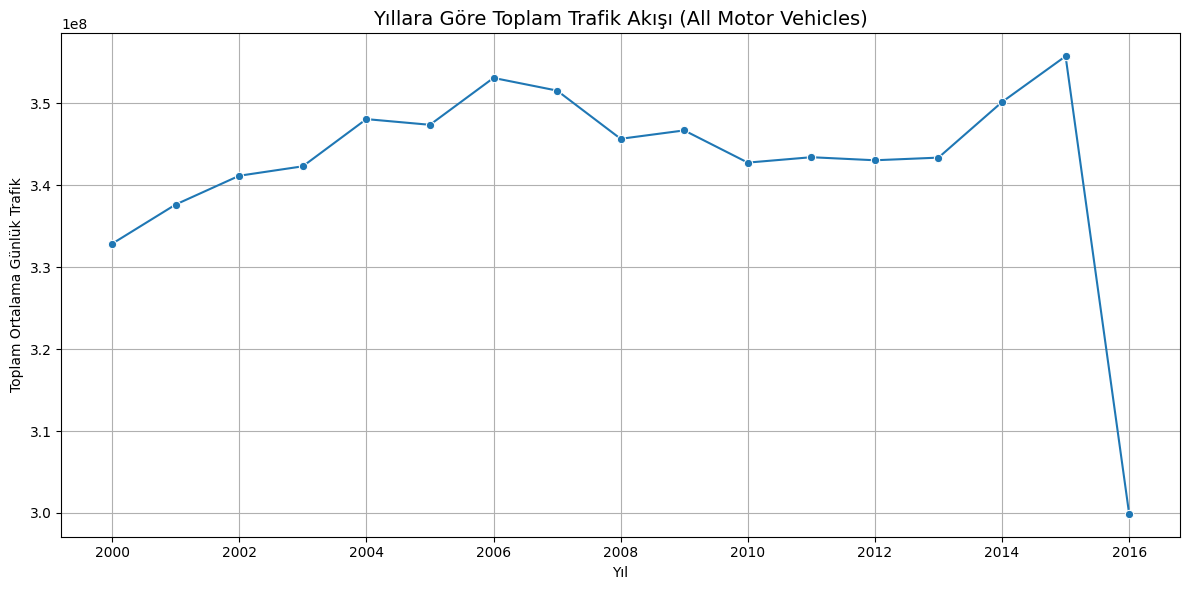

In [15]:
# Yıllara göre toplam motorlu araç sayısı (ortalama günlük sayım)
traffic_by_year = traffic_df.groupby('AADFYear')['AllMotorVehicles'].sum().reset_index()

# Grafik çizimi
plt.figure(figsize=(12, 6))
sns.lineplot(data=traffic_by_year, x='AADFYear', y='AllMotorVehicles', marker='o')
plt.title('Yıllara Göre Toplam Trafik Akışı (All Motor Vehicles)', fontsize=14)
plt.xlabel('Yıl')
plt.ylabel('Toplam Ortalama Günlük Trafik')
plt.grid(True)
plt.tight_layout()
plt.show()

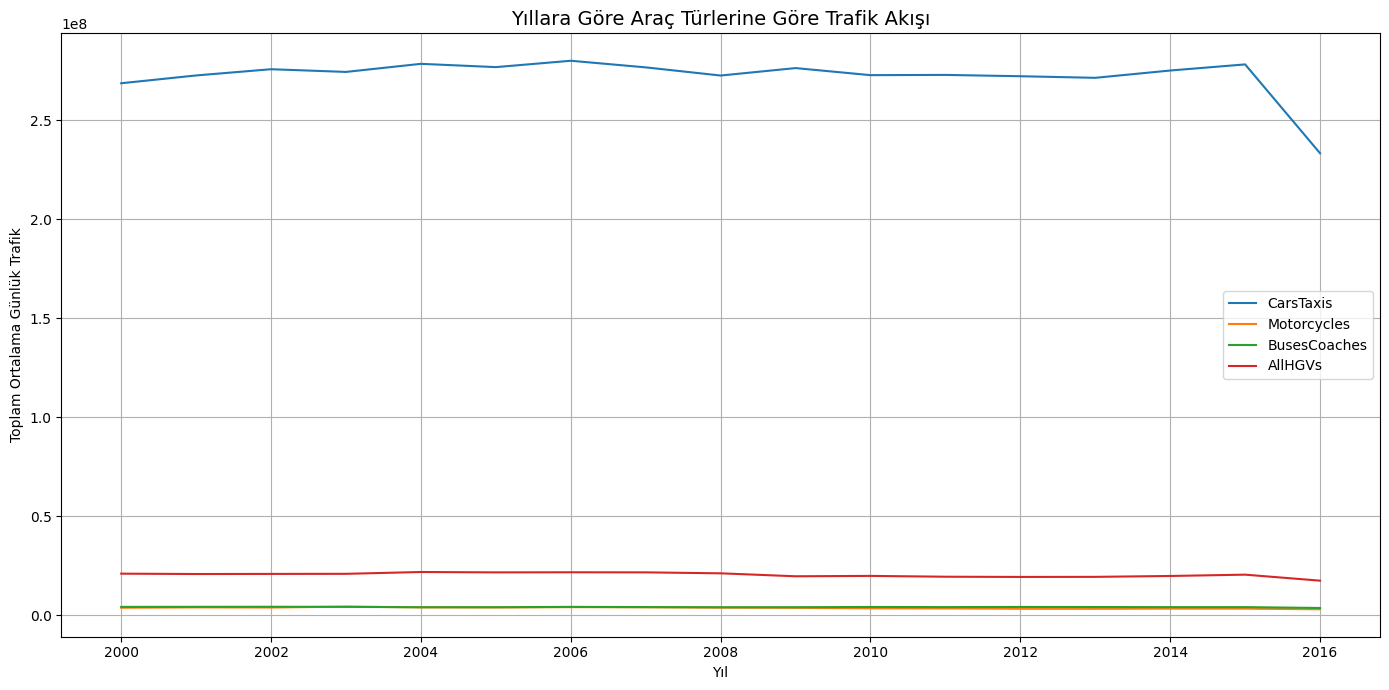

In [16]:
# Araç türlerine göre gruplama
vehicle_types = ['CarsTaxis', 'Motorcycles', 'BusesCoaches', 'AllHGVs']

# Yıllara göre toplamlar
traffic_by_vehicle = traffic_df.groupby('AADFYear')[vehicle_types].sum().reset_index()

# Grafik çizimi
plt.figure(figsize=(14, 7))
for vehicle in vehicle_types:
    sns.lineplot(data=traffic_by_vehicle, x='AADFYear', y=vehicle, label=vehicle)

plt.title('Yıllara Göre Araç Türlerine Göre Trafik Akışı', fontsize=14)
plt.xlabel('Yıl')
plt.ylabel('Toplam Ortalama Günlük Trafik')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Kaza verisinin genel yapısını inceleyelim
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         1

In [19]:
# İlk birkaç satıra göz atalım
accidents_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [20]:
# Eksik veri kontrolü
accidents_df.isnull().sum()

Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                             101
Longitude                                          101
Latitude                                           101
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               117
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                          0
Junction_D

In [22]:
# %90'dan fazla eksik olan sütunları kaldır
threshold = 0.9
missing_ratios = accidents_df.isnull().mean()
cols_to_drop = missing_ratios[missing_ratios > threshold].index
accidents_df.drop(columns=cols_to_drop, inplace=True)

In [23]:
# 'Time' sütununu en yaygın zamanla doldur (mod)
accidents_df['Time'].fillna(accidents_df['Time'].mode()[0], inplace=True)

In [24]:
# Konum verileri: ortalama ile doldur (sayısal değer)
for col in ['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude', 'Latitude']:
    accidents_df[col].fillna(accidents_df[col].mean(), inplace=True)

In [25]:
# Yaya geçidi bilgileri (Mod) ile doldur
accidents_df['Pedestrian_Crossing-Human_Control'].fillna(accidents_df['Pedestrian_Crossing-Human_Control'].mode()[0], inplace=True)
accidents_df['Pedestrian_Crossing-Physical_Facilities'].fillna(accidents_df['Pedestrian_Crossing-Physical_Facilities'].mode()[0], inplace=True)

In [26]:
# Hava, yüzey koşulları (Mod) ile doldur
accidents_df['Weather_Conditions'].fillna(accidents_df['Weather_Conditions'].mode()[0], inplace=True)
accidents_df['Road_Surface_Conditions'].fillna(accidents_df['Road_Surface_Conditions'].mode()[0], inplace=True)

In [29]:
# Polis memuru durumu (Mod) ile doldur
accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'].fillna(accidents_df['Did_Police_Officer_Attend_Scene_of_Accident'].mode()[0], inplace=True)

In [27]:
# LSOA bölgesi (Mod) ile doldur
# Kategorik olduğu için yine mod kullanılabilir
accidents_df['LSOA_of_Accident_Location'].fillna(accidents_df['LSOA_of_Accident_Location'].mode()[0], inplace=True)

In [31]:
# Eksik Junction_Control verilerini "Unknown" olarak doldur
accidents_df['Junction_Control'].fillna('Unknown', inplace=True)

In [32]:
print(accidents_df.isnull().sum())

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number     

In [34]:
# YILLARA GÖRE KAZA SAYISI VE TRAFİK AKIŞI
# Kazaların yıllık toplamı
accidents_df['Accident_Year'] = pd.to_datetime(accidents_df['Date'], dayfirst=True).dt.year
yearly_accidents = accidents_df.groupby('Accident_Year').size().reset_index(name='Accident_Count')

# Trafik akışı yıllık toplamı
yearly_traffic = traffic_df.groupby('AADFYear')['AllMotorVehicles'].sum().reset_index(name='Total_Traffic')

# Yılları eşitlemek için ortak yıl kümesini al
common_years = set(yearly_accidents['Accident_Year']).intersection(set(yearly_traffic['AADFYear']))

# Ortak yıllarla filtrele
yearly_accidents = yearly_accidents[yearly_accidents['Accident_Year'].isin(common_years)]
yearly_traffic = yearly_traffic[yearly_traffic['AADFYear'].isin(common_years)]

# Birleştir
merged_df = pd.merge(yearly_accidents, yearly_traffic, left_on='Accident_Year', right_on='AADFYear')

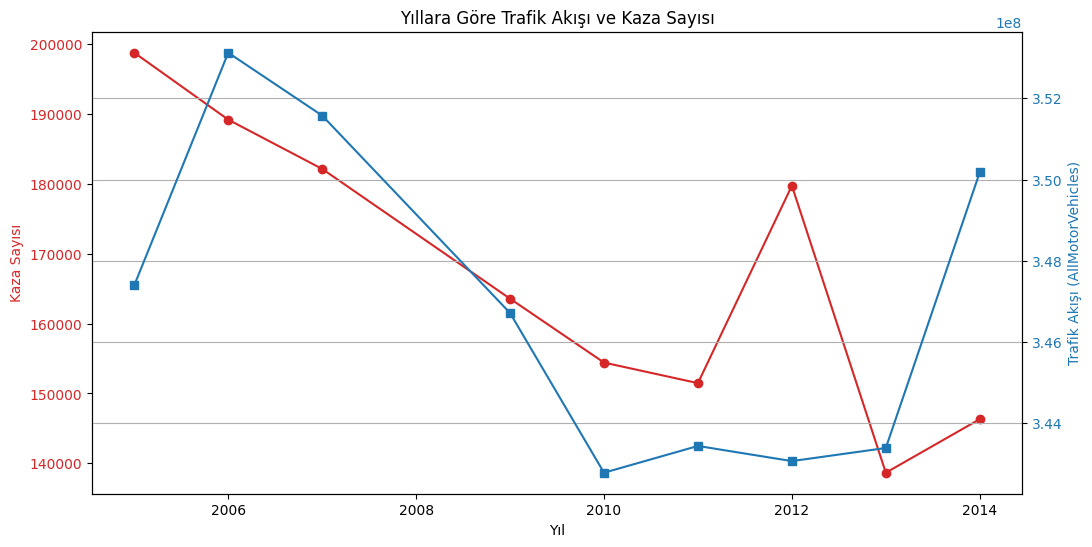

In [35]:
# GRAFİK
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Yıl')
ax1.set_ylabel('Kaza Sayısı', color='tab:red')
ax1.plot(merged_df['Accident_Year'], merged_df['Accident_Count'], color='tab:red', marker='o', label='Kaza Sayısı')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Trafik Akışı (AllMotorVehicles)', color='tab:blue')
ax2.plot(merged_df['AADFYear'], merged_df['Total_Traffic'], color='tab:blue', marker='s', label='Trafik Akışı')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title("Yıllara Göre Trafik Akışı ve Kaza Sayısı")
plt.grid(True)
plt.show()


In [38]:
# trafik akışı ile kaza sayısı arasındaki ilişkiyi Pearson korelasyon katsayısı ile analiz edelim
import pandas as pd
from scipy.stats import pearsonr

# Trafik akışı verisini içeren dataframe (örnek adı: traffic_df)
# Aşağıdaki iki değişkenin aynı yıl aralığını kapsadığından emin olalım.
merged_df = pd.merge(
    yearly_accidents,  # Kazaların yıllık toplamı
    traffic_df[['AADFYear', 'AllMotorVehicles']],  # Trafik akışı verileri
    left_on='Accident_Year', right_on='AADFYear'
)

# Korelasyon analizi
correlation = merged_df['Accident_Count'].corr(merged_df['AllMotorVehicles'])
print("Kaza Sayısı ile Trafik Akışı Arasındaki Korelasyon:", correlation)

Kaza Sayısı ile Trafik Akışı Arasındaki Korelasyon: 0.007000264376838273


In [41]:
# Yıllık toplam kaza sayısını hesapla
accidents_df['Accident_Year'] = pd.to_datetime(accidents_df['Date'], dayfirst=True).dt.year
yearly_accidents = accidents_df.groupby('Accident_Year').size().reset_index(name='Accident_Count')

# Trafik verisinde yıl sütunu zaten 'AADFYear'
traffic_yearly = traffic_df.groupby('AADFYear')['AllMotorVehicles'].sum().reset_index()

# Birleştir
merged_df = pd.merge(
    yearly_accidents,
    traffic_yearly,
    left_on='Accident_Year',
    right_on='AADFYear'
)

# Kaza oranı hesapla
merged_df['Accident_Rate'] = merged_df['Accident_Count'] / merged_df['AllMotorVehicles']

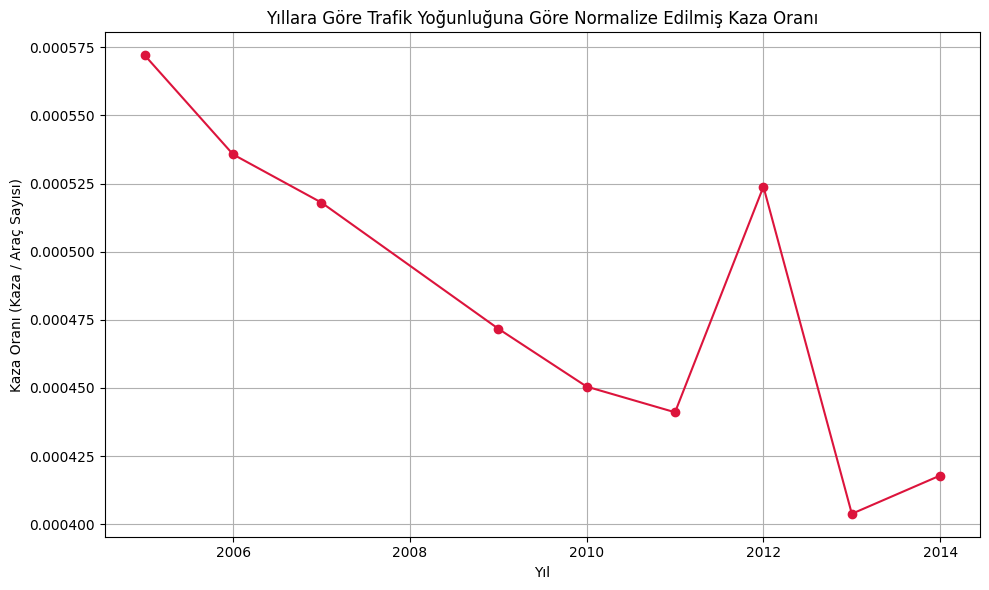

In [42]:
plt.figure(figsize=(10,6))
plt.plot(merged_df['Accident_Year'], merged_df['Accident_Rate'], marker='o', color='crimson')
plt.title("Yıllara Göre Trafik Yoğunluğuna Göre Normalize Edilmiş Kaza Oranı")
plt.xlabel("Yıl")
plt.ylabel("Kaza Oranı (Kaza / Araç Sayısı)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
# 2012 yılına ait kaza verilerini filtrele
accidents_2012 = accidents_df[accidents_df['Accident_Year'] == 2012]

# Kaza şiddeti dağılımı
severity_counts = accidents_2012['Accident_Severity'].value_counts()

# Şehir içi/şehirdışı dağılımı
urban_rural_counts = accidents_2012['Urban_or_Rural_Area'].value_counts()

# Yol tipi dağılımı
road_type_counts = accidents_2012['Road_Type'].value_counts()

print("Kaza Şiddeti Dağılımı:\n", severity_counts)
print("\nŞehir İçi / Dışı Dağılımı:\n", urban_rural_counts)
print("\nYol Tipi Dağılımı:\n", road_type_counts)


Kaza Şiddeti Dağılımı:
 Accident_Severity
3    151194
2     26484
1      2037
Name: count, dtype: int64

Şehir İçi / Dışı Dağılımı:
 Urban_or_Rural_Area
1    121609
2     58106
Name: count, dtype: int64

Yol Tipi Dağılımı:
 Road_Type
Single carriageway    136236
Dual carriageway       25424
Roundabout             12118
One way street          3395
Slip road               1862
Unknown                  680
Name: count, dtype: int64


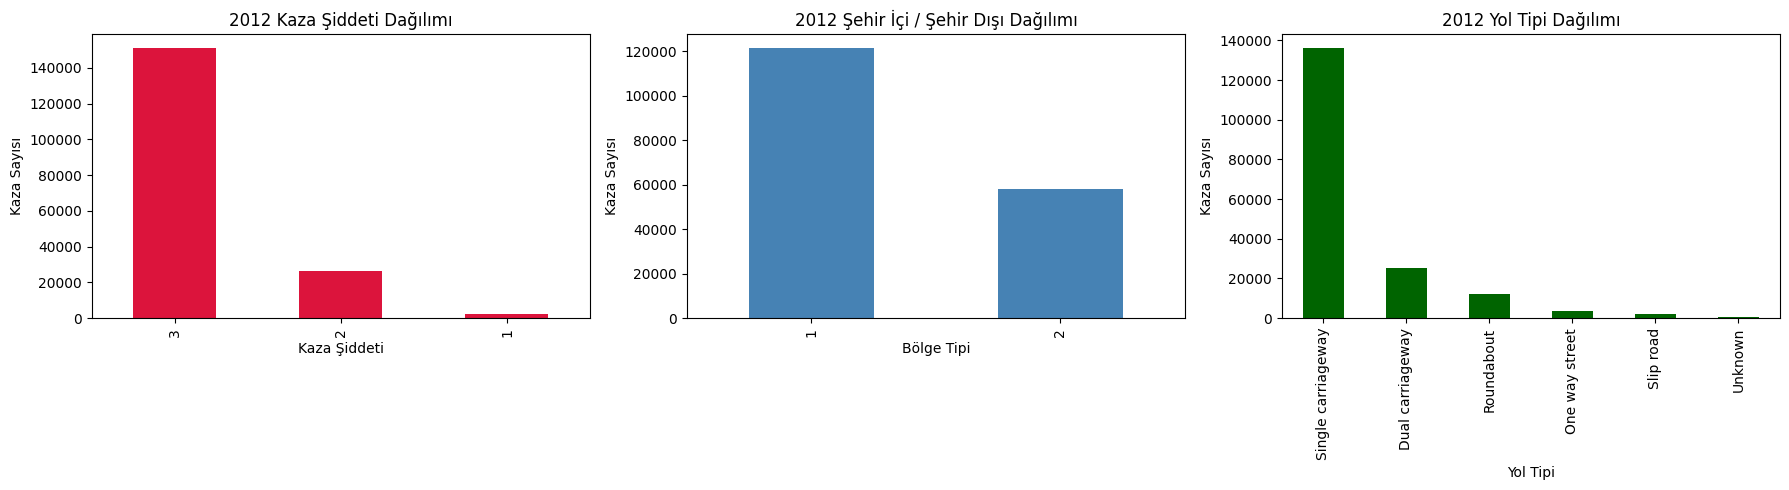

In [44]:
# Kaza Şiddeti Grafiği
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Kaza Şiddeti Dağılımı
severity_counts.plot(kind='bar', ax=axes[0], color='crimson')
axes[0].set_title('2012 Kaza Şiddeti Dağılımı')
axes[0].set_ylabel('Kaza Sayısı')
axes[0].set_xlabel('Kaza Şiddeti')

# Şehir İçi / Şehir Dışı Dağılımı
urban_rural_counts.plot(kind='bar', ax=axes[1], color='steelblue')
axes[1].set_title('2012 Şehir İçi / Şehir Dışı Dağılımı')
axes[1].set_ylabel('Kaza Sayısı')
axes[1].set_xlabel('Bölge Tipi')

# Yol Tipi Dağılımı
road_type_counts.plot(kind='bar', ax=axes[2], color='darkgreen')
axes[2].set_title('2012 Yol Tipi Dağılımı')
axes[2].set_ylabel('Kaza Sayısı')
axes[2].set_xlabel('Yol Tipi')

plt.tight_layout()
plt.show()

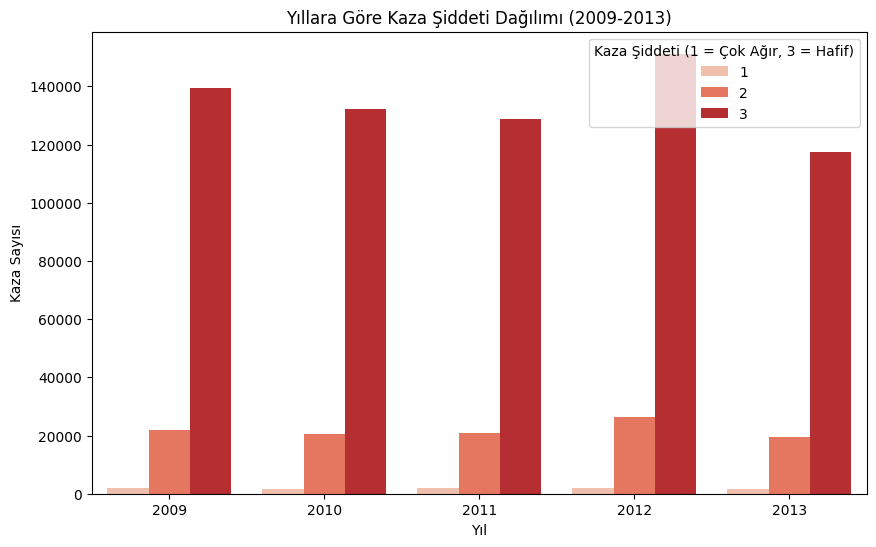

In [46]:
# Yıllara Göre Kaza Şiddeti Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(data=accidents_df[accidents_df['Year'].between(2009, 2013)],
              x='Year', hue='Accident_Severity', palette='Reds')
plt.title('Yıllara Göre Kaza Şiddeti Dağılımı (2009-2013)')
plt.xlabel('Yıl')
plt.ylabel('Kaza Sayısı')
plt.legend(title='Kaza Şiddeti (1 = Çok Ağır, 3 = Hafif)')
plt.show()


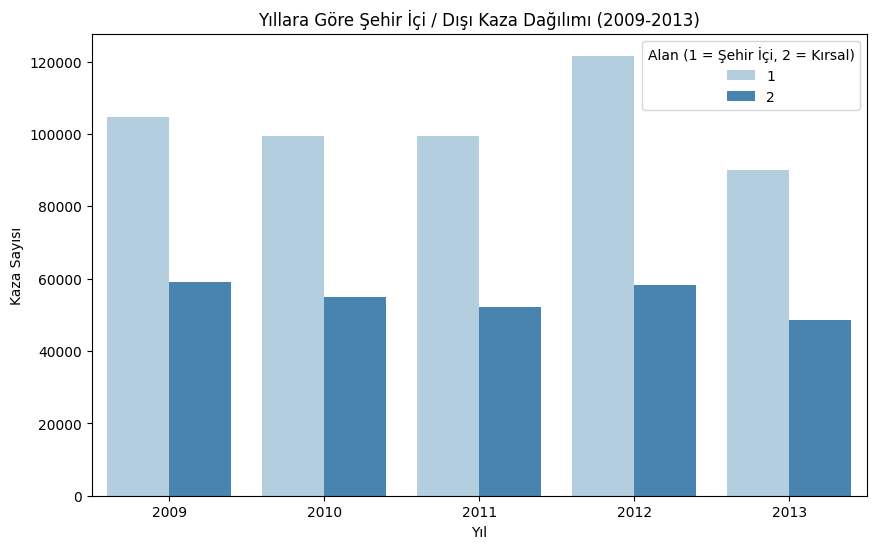

In [47]:
# Yıllara Göre Şehir İçi / Dışı Kaza Dağılımı
plt.figure(figsize=(10, 6))
sns.countplot(data=accidents_df[accidents_df['Year'].between(2009, 2013)],
              x='Year', hue='Urban_or_Rural_Area', palette='Blues')
plt.title('Yıllara Göre Şehir İçi / Dışı Kaza Dağılımı (2009-2013)')
plt.xlabel('Yıl')
plt.ylabel('Kaza Sayısı')
plt.legend(title='Alan (1 = Şehir İçi, 2 = Kırsal)')
plt.show()

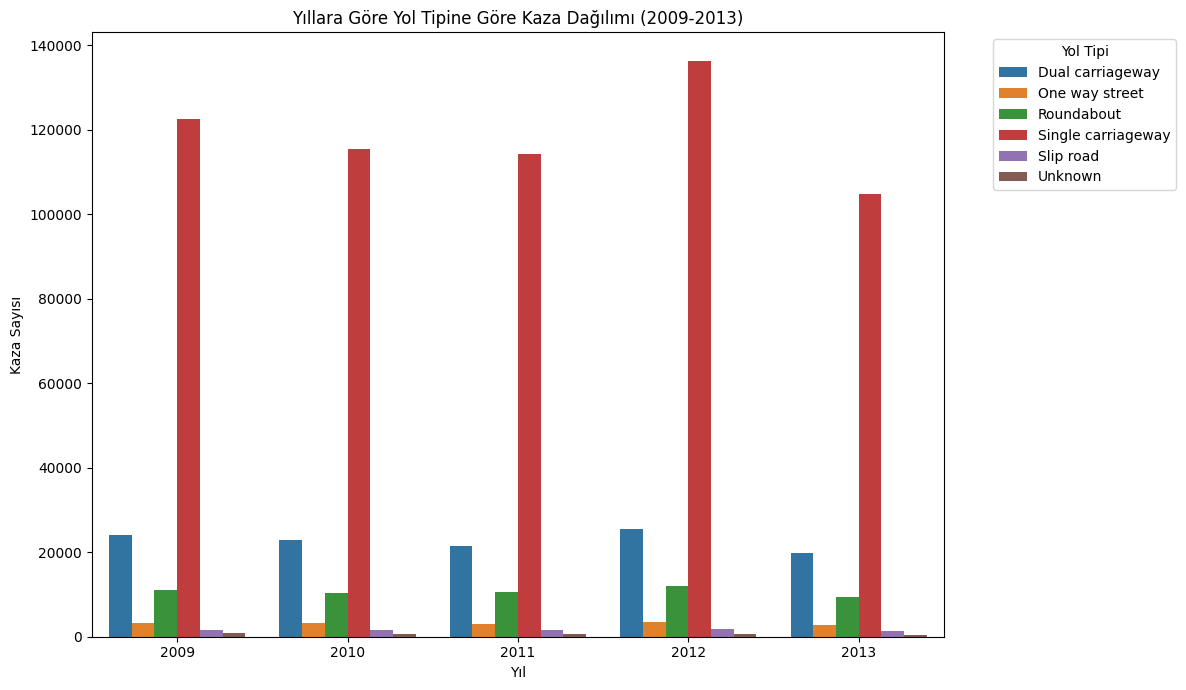

In [48]:
# Yıllara Göre Yol Tipine Göre Kaza Dağılımı
plt.figure(figsize=(12, 7))
road_counts = (accidents_df[accidents_df['Year'].between(2009, 2013)]
               .groupby(['Year', 'Road_Type'])
               .size()
               .reset_index(name='Kaza_Sayısı'))

sns.barplot(data=road_counts, x='Year', y='Kaza_Sayısı', hue='Road_Type')
plt.title('Yıllara Göre Yol Tipine Göre Kaza Dağılımı (2009-2013)')
plt.xlabel('Yıl')
plt.ylabel('Kaza Sayısı')
plt.legend(title='Yol Tipi', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

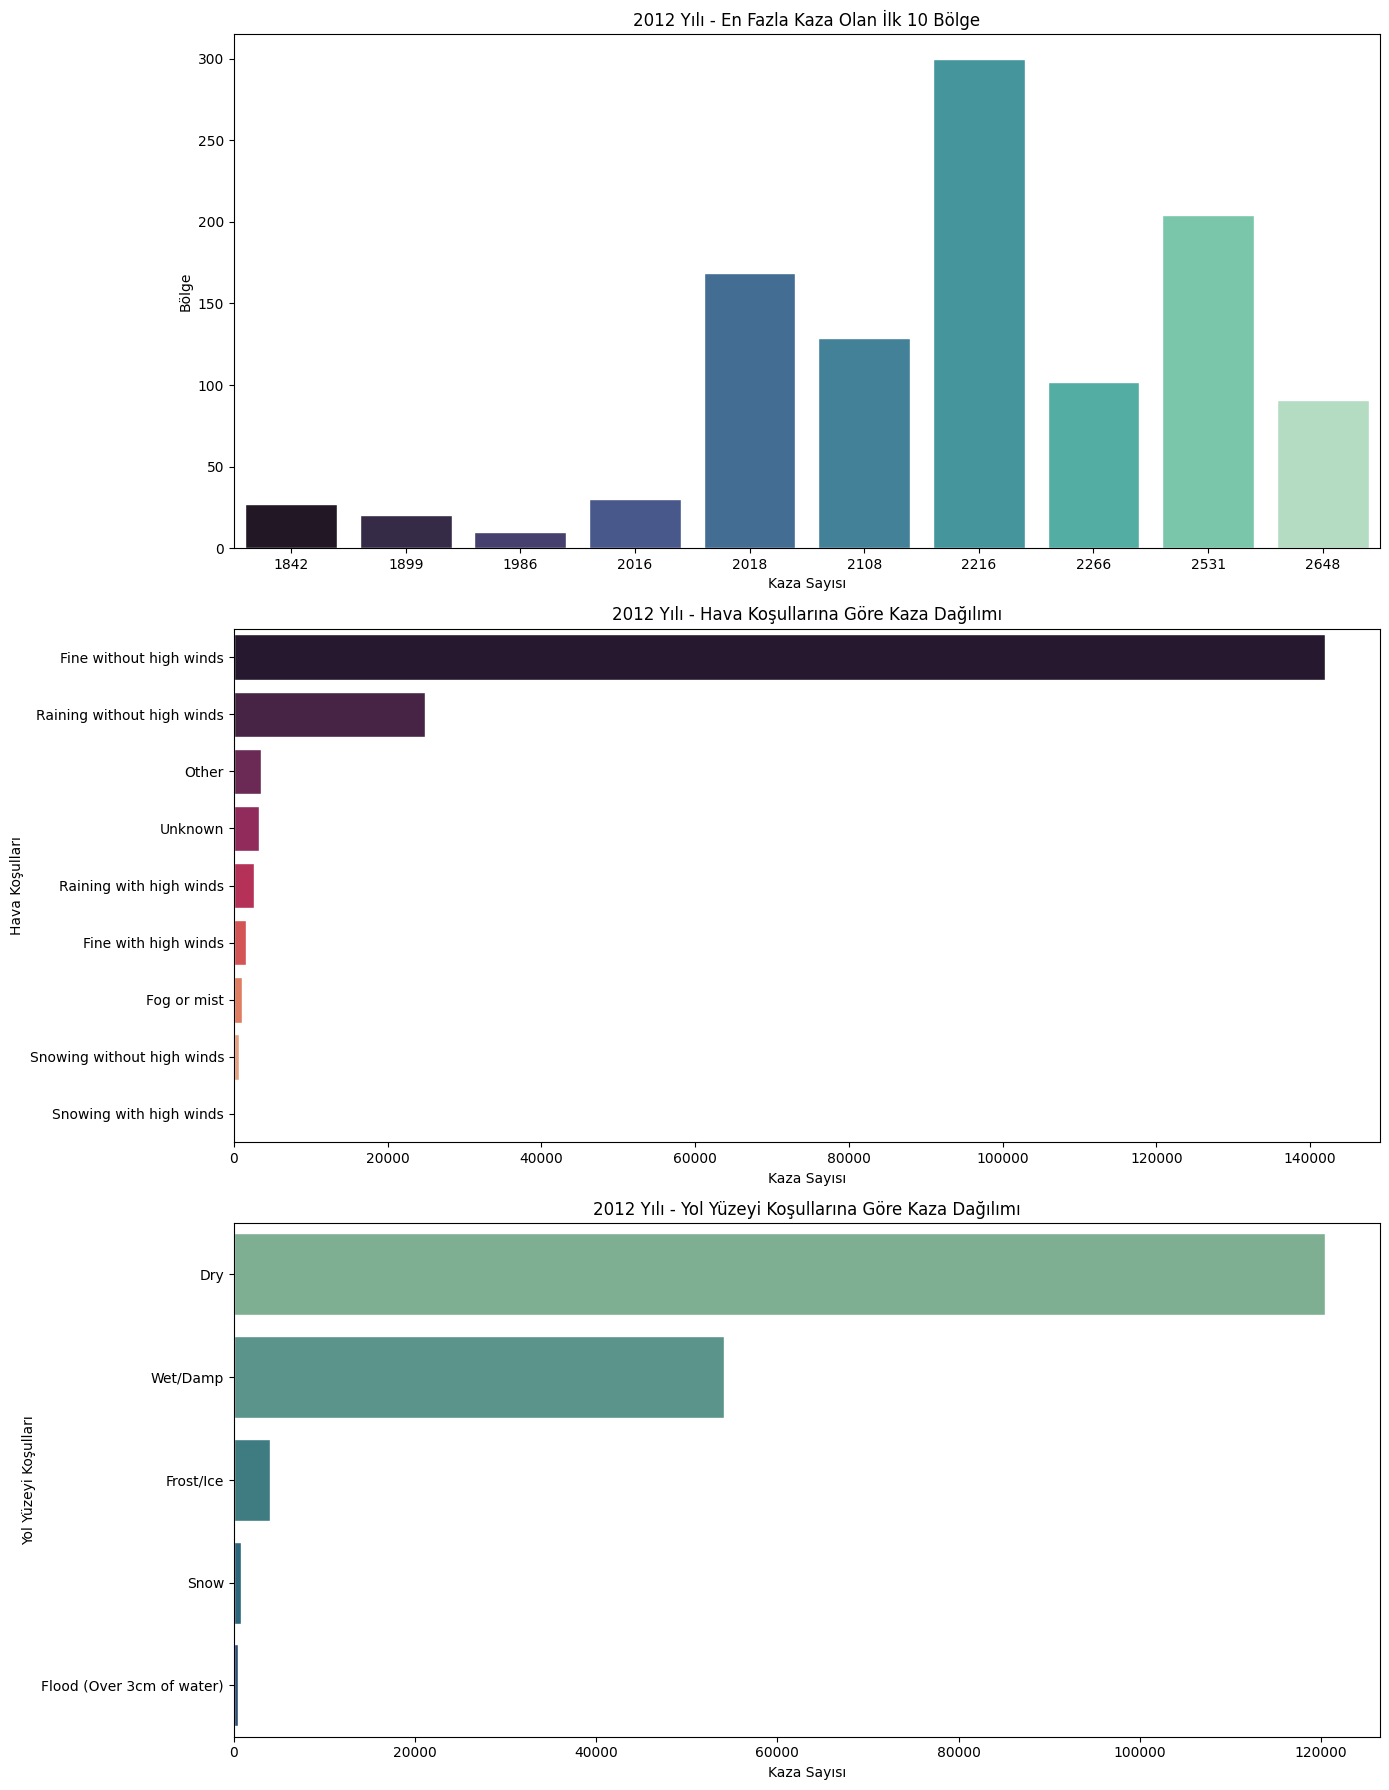

In [49]:
# bölge bazlı veya hava durumu, yol yüzeyi gibi koşullarla da derinlemesine inceleme

# 2012 yılına ait kazaları filtrele
accidents_2012 = accidents_df[accidents_df['Year'] == 2012]

# İlk 10 yerel yönetim birimi (local authority)
top_local_auths = accidents_2012['Local_Authority_(District)'].value_counts().nlargest(10)

# Hava koşulları
weather_conditions = accidents_2012['Weather_Conditions'].value_counts()

# Yol yüzeyi koşulları
road_surface = accidents_2012['Road_Surface_Conditions'].value_counts()

# Grafik ayarları
fig, axs = plt.subplots(3, 1, figsize=(14, 18))
sns.set_style("whitegrid")

# Bölge bazlı kaza sayısı
sns.barplot(x=top_local_auths.values, y=top_local_auths.index, ax=axs[0], palette="mako")
axs[0].set_title("2012 Yılı - En Fazla Kaza Olan İlk 10 Bölge")
axs[0].set_xlabel("Kaza Sayısı")
axs[0].set_ylabel("Bölge")

# Hava durumu dağılımı
sns.barplot(x=weather_conditions.values, y=weather_conditions.index, ax=axs[1], palette="rocket")
axs[1].set_title("2012 Yılı - Hava Koşullarına Göre Kaza Dağılımı")
axs[1].set_xlabel("Kaza Sayısı")
axs[1].set_ylabel("Hava Koşulları")

# Yol yüzeyi koşulları
sns.barplot(x=road_surface.values, y=road_surface.index, ax=axs[2], palette="crest")
axs[2].set_title("2012 Yılı - Yol Yüzeyi Koşullarına Göre Kaza Dağılımı")
axs[2].set_xlabel("Kaza Sayısı")
axs[2].set_ylabel("Yol Yüzeyi Koşulları")

plt.tight_layout()
plt.show()

In [50]:
# Kaza şiddeti ile hava durumu, yol yüzeyi ve ışık koşulları gibi kategorik değişkenler arasında anlamlı bir ilişki olup olmadığı
# Chi-Square Testi (Kategorik veriler için)
from scipy.stats import chi2_contingency

# Yardımcı fonksiyon
def chi_square_test(df, col, target='Accident_Severity'):
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"'{col}' ile '{target}' arasında ilişki testi:")
    print(f"Chi2 Değeri: {chi2:.2f} | p-değeri: {p:.4f}")
    print("Anlamlı mı?", "✅ EVET" if p < 0.05 else "❌ HAYIR")
    print("-" * 50)

# 2012 yılı için testler
chi_square_test(accidents_2012, 'Weather_Conditions')
chi_square_test(accidents_2012, 'Road_Surface_Conditions')
chi_square_test(accidents_2012, 'Light_Conditions')

'Weather_Conditions' ile 'Accident_Severity' arasında ilişki testi:
Chi2 Değeri: 189.40 | p-değeri: 0.0000
Anlamlı mı? ✅ EVET
--------------------------------------------------
'Road_Surface_Conditions' ile 'Accident_Severity' arasında ilişki testi:
Chi2 Değeri: 46.43 | p-değeri: 0.0000
Anlamlı mı? ✅ EVET
--------------------------------------------------
'Light_Conditions' ile 'Accident_Severity' arasında ilişki testi:
Chi2 Değeri: 1102.59 | p-değeri: 0.0000
Anlamlı mı? ✅ EVET
--------------------------------------------------


In [51]:
# 🤖 2. Basit Makine Öğrenmesi Modeli: Kaza Şiddeti Tahmini
#🎯 Amaç: # Accident_Severity değişkenini tahmin etmek (örnek model: Random Forest)
#📌 Veri Hazırlığı ve Modelleme

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Sadece ilgili sütunları seç
features = ['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']
df_model = accidents_2012[features + ['Accident_Severity']].dropna()

# Kategorik değişkenleri sayısal hale getir
le = LabelEncoder()
for col in features + ['Accident_Severity']:
    df_model[col] = le.fit_transform(df_model[col])

# Bağımlı ve bağımsız değişkenler
X = df_model[features]
y = df_model['Accident_Severity']

# Eğitim-test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğit
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)
print("📊 Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))
print("🧩 Karışıklık Matrisi:\n", confusion_matrix(y_test, y_pred))



📊 Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       390
           1       0.33      0.00      0.00      5326
           2       0.84      1.00      0.91     30227

    accuracy                           0.84     35943
   macro avg       0.39      0.33      0.30     35943
weighted avg       0.76      0.84      0.77     35943

🧩 Karışıklık Matrisi:
 [[    0     0   390]
 [    0     1  5325]
 [    0     2 30225]]


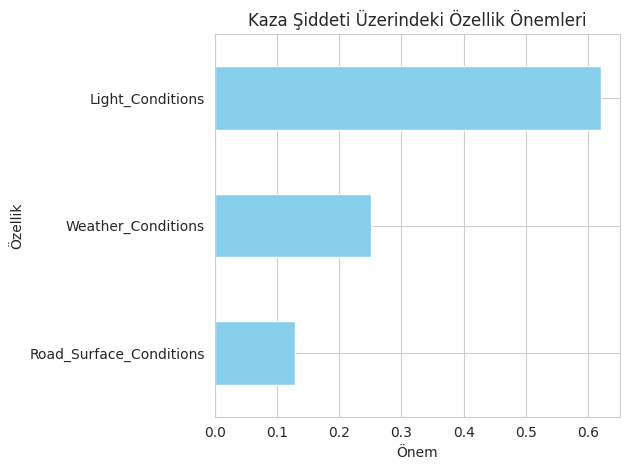

In [52]:
# Önemli Özellikler Grafiği
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Kaza Şiddeti Üzerindeki Özellik Önemleri')
plt.xlabel('Önem')
plt.ylabel('Özellik')
plt.tight_layout()
plt.show()

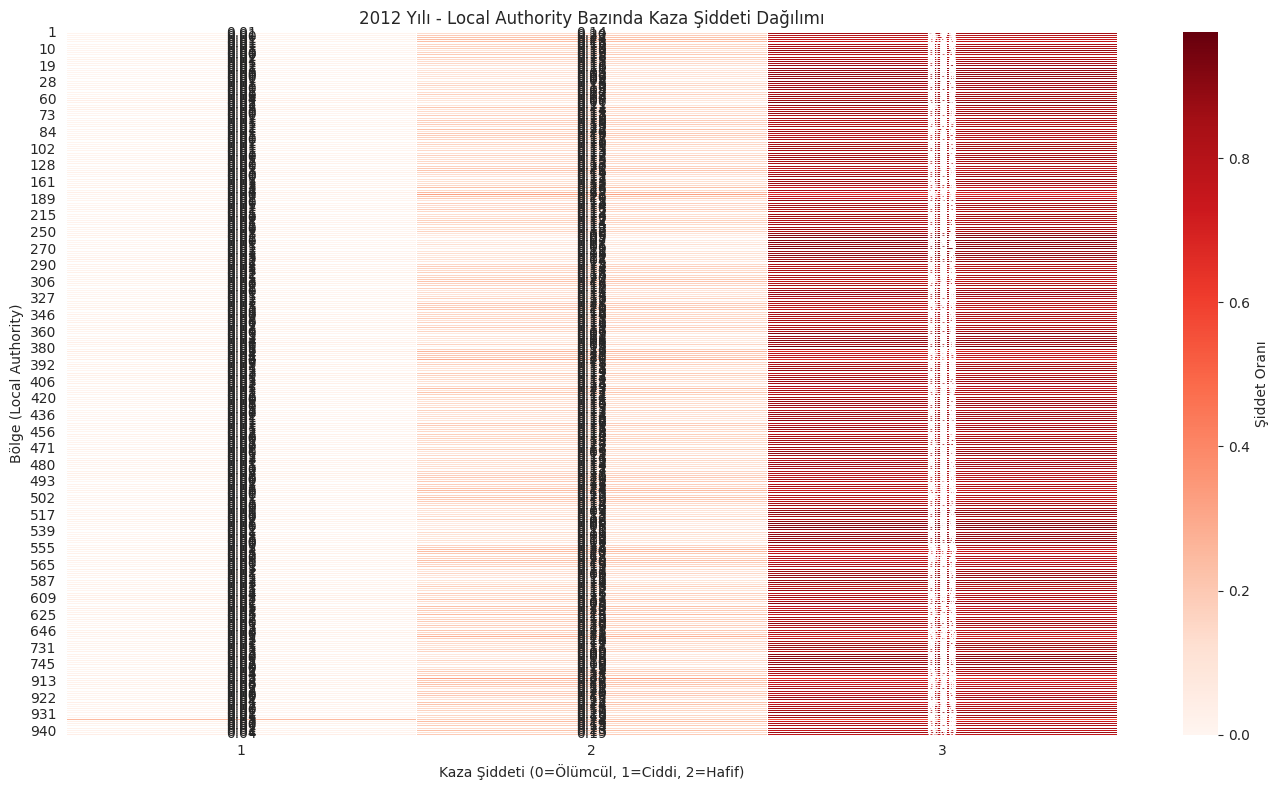

In [56]:
# Local Authority Bazında Kaza Şiddeti Oranları Heatmap
df_2012 = accidents_df[accidents_df['Accident_Year'] == 2012]

# Kaza şiddetini bölgelere göre grupla
grouped = df_2012.groupby(['Local_Authority_(District)', 'Accident_Severity']).size().unstack(fill_value=0)

# Toplam kazalara oranla normalleştir
normalized = grouped.div(grouped.sum(axis=1), axis=0)

# Isı haritası
plt.figure(figsize=(14, 8))
sns.heatmap(normalized, cmap="Reds", annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Şiddet Oranı'})
plt.title("2012 Yılı - Local Authority Bazında Kaza Şiddeti Dağılımı")
plt.ylabel("Bölge (Local Authority)")
plt.xlabel("Kaza Şiddeti (0=Ölümcül, 1=Ciddi, 2=Hafif)")
plt.tight_layout()
plt.show()


In [55]:
print(df_2012.columns)

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year', 'Accident_Year'],
      dtype='object')


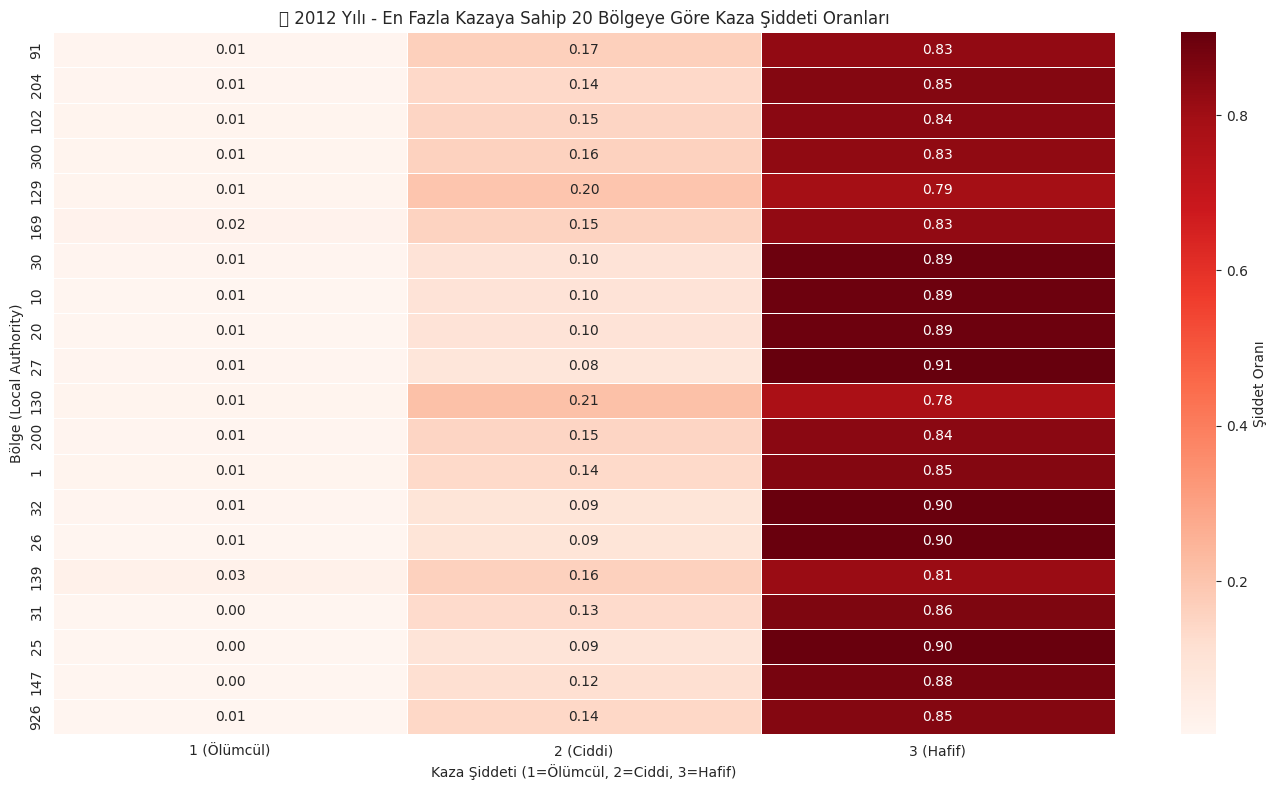

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kaza şiddetini bölgelere göre grupla
grouped = df_2012.groupby(['Local_Authority_(District)', 'Accident_Severity']).size().unstack(fill_value=0)

# Toplam kazalara oranla normalleştir
normalized = grouped.div(grouped.sum(axis=1), axis=0)

# En çok kazaya sahip ilk 20 bölgeyi seç
top_20_regions = grouped.sum(axis=1).sort_values(ascending=False).head(20).index
filtered_normalized = normalized.loc[top_20_regions]

# Heatmap çizimi
plt.figure(figsize=(14, 8))
sns.heatmap(filtered_normalized, cmap="Reds", annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Şiddet Oranı'})
plt.title("🚧 2012 Yılı - En Fazla Kazaya Sahip 20 Bölgeye Göre Kaza Şiddeti Oranları")
plt.ylabel("Bölge (Local Authority)")
plt.xlabel("Kaza Şiddeti (1=Ölümcül, 2=Ciddi, 3=Hafif)")
plt.xticks([0.5, 1.5, 2.5], ['1 (Ölümcül)', '2 (Ciddi)', '3 (Hafif)'])
plt.tight_layout()
plt.show()


In [61]:
# Kayıt Sayısında Anormal Artış?
# Yıllara göre kayıt sayısını karşılaştıralım
accidents_df['Accident_Year'] = pd.to_datetime(accidents_df['Date'], dayfirst=True).dt.year
yearly_counts = accidents_df['Accident_Year'].value_counts().sort_index()
print(yearly_counts)


Accident_Year
2005    198735
2006    189161
2007    182115
2009    163554
2010    154414
2011    151474
2012    179715
2013    138660
2014    146322
Name: count, dtype: int64


In [62]:
# Kpya veya Çoğaltılmış Kayıtlar?
# Hipotez: Aynı kaza birden fazla kez kaydedilmiş olabilir.
# 2012 verisinde aynı tarih, saat, konum, yol tipi olan kayıtlar varsa grupla
duplicates = df_2012.groupby(['Date', 'Time', 'Latitude', 'Longitude', 'Road_Type']).size()
potential_duplicates = duplicates[duplicates > 1]
print("Potansiyel çoğaltılmış kayıt sayısı:", potential_duplicates.shape[0])

Potansiyel çoğaltılmış kayıt sayısı: 34148


In [63]:
# Boş ya da Geçersiz Değerler?
# Hipotez: 2012 yılında veri girilirken bazı alanlar eksik, boş veya geçersiz girilmiş olabilir.
missing_2012 = df_2012.isnull().mean().sort_values(ascending=False)
print("2012 yılı verisinde boş değer oranları:")
print(missing_2012[missing_2012 > 0])

2012 yılı verisinde boş değer oranları:
Series([], dtype: float64)


<Axes: xlabel='Accident_Year'>

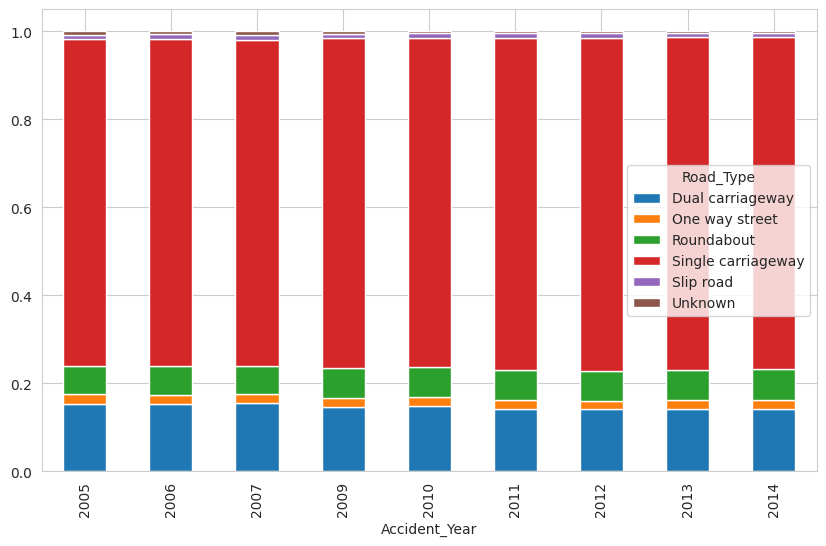

In [66]:
# Dağılımda Bozulma Var mı? (Yol tipi, hava durumu vs.)
# Hipotez: 2012 yılında belirli bir yol tipi veya hava durumu altında kazalar yapay şekilde artmış görünüyor olabilir.
# Yıl bazlı yol tipi dağılımı
pd.crosstab(accidents_df['Accident_Year'], accidents_df['Road_Type'], normalize='index').plot(kind='bar', stacked=True, figsize=(10,6))

In [65]:
# Zaman Dağılımında Anormallik? (Saat / Ay)
# Hipotez: 2012 yılında özellikle belli saatlerde ya da aylarda yığılma olabilir.
# Aylık kaza sayısı
df_2012['Month'] = pd.to_datetime(df_2012['Date'], dayfirst=True).dt.month
monthly_counts = df_2012['Month'].value_counts().sort_index()
print("2012 - Aylık kaza sayıları:")
print(monthly_counts)


2012 - Aylık kaza sayıları:
Month
1     14987
2     13746
3     15390
4     13630
5     15264
6     14012
7     15644
8     14410
9     15936
10    16038
11    16224
12    14434
Name: count, dtype: int64
